In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import analysis_parameters as ap

model="NICAM"
var = "clt"

In [2]:
file = ap.get_filename(model, var, day="02-06")
grid = ap.get_gridfile(model)

Lat/lon included in variable file, no need to get a grid


In [ ]:
file, grid

('/scratch/b/b380887/global_tropics/NICAM/NICAM_int_froz_winter_GT.nc', None)

In [ ]:
# xr.open_dataset("/scratch/b/b380887/global_tropics/NICAM/NICAM_OLR_winter_GT.nc")

In [5]:
var_ds = xr.open_dataset(file)[var]
if grid is not(None):
    grid_ds = xr.open_dataset(grid)


KeyError: 'clt'

In [5]:
var_ds

<xarray.DataArray 'clt' (time: 96, Xdim: 49766400)>
[4777574400 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2020-02-06 ... 2020-02-06T23:45:00
    lons     (Xdim) float32 ...
    lats     (Xdim) float32 ...
Dimensions without coordinates: Xdim
Attributes:
    long_name:      vertically_integrated_cloud_cover
    units:          1
    CDI_grid_type:  unstructured
    standard_name:  cloud_area_fraction
    origin:         TQC

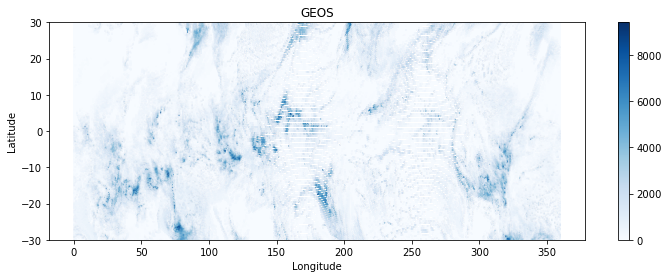

In [6]:
fig = plt.figure(figsize=(12,4))
plt.scatter(var_ds.lons[::20], var_ds.lats[::20], c=var_ds[0,::20].values, s=0.01, cmap="Blues")
plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.ylim([-30,30])
plt.title(model)
plt.savefig("../plots/{}_{}.png".format(model, var))
plt.show()